In [2]:
%matplotlib notebook
from QDP import qdp
import os.path
import numpy as np
from scipy.stats import poisson
import h5py
import matplotlib.pyplot as plt
from scipy.optimize import leastsq,curve_fit

In [2]:

# dp = '/Volumes/E/Rb/Data'
# exp_name = '2018_02_01_00_22_16_Microwave Ramsey with Ryd780A, parked at r1-r2'
# exp_date = '_'.join(exp_name.split('_')[:3])
# experiment_file = os.path.join(exp_date, exp_name, 'results.hdf5')
# # # print experiment_file
# # #h5py.File('/Volumes/E/Rb/Data/2018_01_29/2018_01_29_13_23_53_2D MOT freq scan/results.hdf5')
# # h5py.File('/Volumes/E/Rb/Data/2018_01_29/2018_01_29_13_23_53_2D MOT freq scan/results.hdf5')
# cuts = [[450],[450],[450]]

# q = qdp.QDP(base_data_path=dp)
# q.load_data_file(experiment_file)
# for r in range(5):
#     q.set_thresholds(cuts, roi=r)

In [ ]:
exp_id='2018_02_05_10_44_22_Closed loop Ramsey, r1-r2, multiple runs'
analysis_master_path='Y:/Rb/Analysis/' # Y:\ is network drive connected to Hexagon E:\Rb\
data_master_path='D:/Data/' # D:\ is local SSD in the main experiment computer
exp_date="_".join(exp_id.split("_")[:3]) # Date folder name automatically generated from exp name.
exp_path=exp_date+'/'+exp_id+'/'
dp=exp_path
cuts = [[450],[450],[450]]

q = qdp.QDP(base_data_path=dp)
q.load_data_file(experiment_file)
for r in range(5):
    q.set_thresholds(cuts, roi=r)

In [5]:
q.experiments[0]['variable_list']
xlab = q.experiments[0]['variable_desc'][q.experiments[0]['variable_list'][0]]['description']

In [6]:
q.get_thresholds()

{0: [[450], [450], [450]],
 1: [[450], [450], [450]],
 2: [[450], [450], [450]],
 3: [[450], [450], [450]],
 4: [[450], [450], [450]]}

In [7]:
retention = q.apply_thresholds()
print retention['ivar']


[[[ 0.      0.      0.      0.      0.    ]
  [ 0.0005  0.0005  0.0005  0.0005  0.0005]
  [ 0.001   0.001   0.001   0.001   0.001 ]
  [ 0.0015  0.0015  0.0015  0.0015  0.0015]
  [ 0.002   0.002   0.002   0.002   0.002 ]
  [ 0.0025  0.0025  0.0025  0.0025  0.0025]
  [ 0.003   0.003   0.003   0.003   0.003 ]
  [ 0.0035  0.0035  0.0035  0.0035  0.0035]
  [ 0.004   0.004   0.004   0.004   0.004 ]
  [ 0.0045  0.0045  0.0045  0.0045  0.0045]
  [ 0.005   0.005   0.005   0.005   0.005 ]
  [ 0.0055  0.0055  0.0055  0.0055  0.0055]
  [ 0.006   0.006   0.006   0.006   0.006 ]
  [ 0.0065  0.0065  0.0065  0.0065  0.0065]
  [ 0.007   0.007   0.007   0.007   0.007 ]
  [ 0.0075  0.0075  0.0075  0.0075  0.0075]
  [ 0.008   0.008   0.008   0.008   0.008 ]
  [ 0.0085  0.0085  0.0085  0.0085  0.0085]
  [ 0.009   0.009   0.009   0.009   0.009 ]
  [ 0.0095  0.0095  0.0095  0.0095  0.0095]
  [ 0.01    0.01    0.01    0.01    0.01  ]]]


QDP/qdp.py:85: RuntimeWarning: invalid value encountered in sqrt
  errs[r] = (z/n[r].astype('float'))*np.sqrt(ns[r].astype('float')*(1.0-ns[r].astype('float')/n[r].astype('float')))


In [175]:
tbl_str = "ivar:\t{0:.2f}\tretention:{1:.3f} +- {2:.3f}"
for i in range(len(retention['retention'].flatten())):
    print(tbl_str.format(
        retention['ivar'].flatten()[i],
        retention['retention'].flatten()[i],
        retention['error'].flatten()[i]
    ))

ivar:	0.00	retention:0.178 +- 0.047
ivar:	0.00	retention:0.450 +- 0.047
ivar:	0.00	retention:0.950 +- 0.047
ivar:	0.00	retention:0.900 +- 0.047
ivar:	0.00	retention:0.500 +- 0.047
ivar:	1.00	retention:0.183 +- 0.046
ivar:	1.00	retention:0.600 +- 0.046
ivar:	1.00	retention:0.861 +- 0.046
ivar:	1.00	retention:0.778 +- 0.046
ivar:	1.00	retention:0.571 +- 0.046
ivar:	2.00	retention:0.391 +- 0.046
ivar:	2.00	retention:0.625 +- 0.046
ivar:	2.00	retention:0.958 +- 0.046
ivar:	2.00	retention:1.000 +- 0.046
ivar:	2.00	retention:0.833 +- 0.046
ivar:	3.00	retention:0.085 +- 0.047
ivar:	3.00	retention:0.487 +- 0.047
ivar:	3.00	retention:0.773 +- 0.047
ivar:	3.00	retention:0.636 +- 0.047
ivar:	3.00	retention:0.333 +- 0.047
ivar:	4.00	retention:0.231 +- 0.047
ivar:	4.00	retention:0.494 +- 0.047
ivar:	4.00	retention:0.852 +- 0.047
ivar:	4.00	retention:0.818 +- 0.047
ivar:	4.00	retention:0.714 +- 0.047
ivar:	5.00	retention:0.231 +- 0.046
ivar:	5.00	retention:0.575 +- 0.046
ivar:	5.00	retention:0.875 +

In [8]:
q.save_experiment_data()

AttributeError: QDP instance has no attribute 'version'

In [139]:
def sin(x,C,F,phi,A):
    res = (C*np.sin((2*np.pi*F*x)+phi)) + A
    return res 
def sin_fit(datax,datay):
    [fit,p] = curve_fit(sin,datax,datay,[0.4,1,-0.19,1])
    return fit


In [9]:
try:
    startvar = np.squeeze(retention['ivar'])[0][0][0]
    roi = 2
    var_2var = [[[startvar],[]]]
    reten_2var=[[]]
    error_2var = [[]]
    redX_2var = [[]]
    redY_2var = [[]]
    FORTX_2var = [[]]
    FORTY_2var = [[]]
    array_index_var = 0
    for i in range(len(np.squeeze(retention['ivar'])[0])):
        if np.squeeze(retention['ivar'])[0][i][roi] == startvar:
            reten_2var[array_index_var].append(np.squeeze(retention['retention'])[i][roi])
            redX_2var[array_index_var].append(np.squeeze(retention['redX'])[i][roi])
            redY_2var[array_index_var].append(np.squeeze(retention['redY'])[i][roi])
            FORTX_2var[array_index_var].append(np.squeeze(retention['FORTX'])[i][roi])
            FORTY_2var[array_index_var].append(np.squeeze(retention['FORTY'])[i][roi])
            error_2var[array_index_var].append(np.squeeze(retention['error'])[i][roi])
            var_2var[array_index_var][1].append(np.squeeze(retention['ivar'])[1][i][roi])
        else:
            startvar = np.squeeze(retention['ivar'])[0][i][roi]
            var_2var.append([[startvar],[]])
            reten_2var.append([])
            redX_2var.append([])
            redY_2var.append([])
            FORTX_2var.append([])
            FORTY_2var.append([])
            error_2var.append([])
            array_index_var += 1
            redX_2var[array_index_var].append(np.squeeze(retention['redX'])[i][roi])
            redY_2var[array_index_var].append(np.squeeze(retention['redY'])[i][roi])
            FORTX_2var[array_index_var].append(np.squeeze(retention['FORTX'])[i][roi])
            FORTY_2var[array_index_var].append(np.squeeze(retention['FORTY'])[i][roi])
            var_2var[array_index_var][1].append(np.squeeze(retention['ivar'])[1][i][roi])
            reten_2var[array_index_var].append(np.squeeze(retention['retention'])[i][roi])
            error_2var[array_index_var].append(np.squeeze(retention['error'])[i][roi])
            print reten_2var

except:
    startvar = np.squeeze(retention['ivar'])[0][0]
    roi = 1
    var_1var = []
    reten_1var=[]
    error_1var = []
    redX_1var = []
    redY_1var = []
    FORTX_1var = []
    FORTY_1var = []
    array_index_var = 0
    for i in range(len(np.squeeze(retention['ivar']))):
            redX_1var.append(np.squeeze(retention['redX'])[i][roi])
            redY_1var.append(np.squeeze(retention['redY'])[i][roi])
            FORTX_1var.append(np.squeeze(retention['FORTX'])[i][roi])
            FORTY_1var.append(np.squeeze(retention['FORTY'])[i][roi])
            var_1var.append(np.squeeze(retention['ivar'])[i][roi])
            reten_1var.append(np.squeeze(retention['retention'])[i][roi])
            error_1var.append(np.squeeze(retention['error'])[i][roi])
            array_index_var += 1


<IPython.core.display.Javascript object>


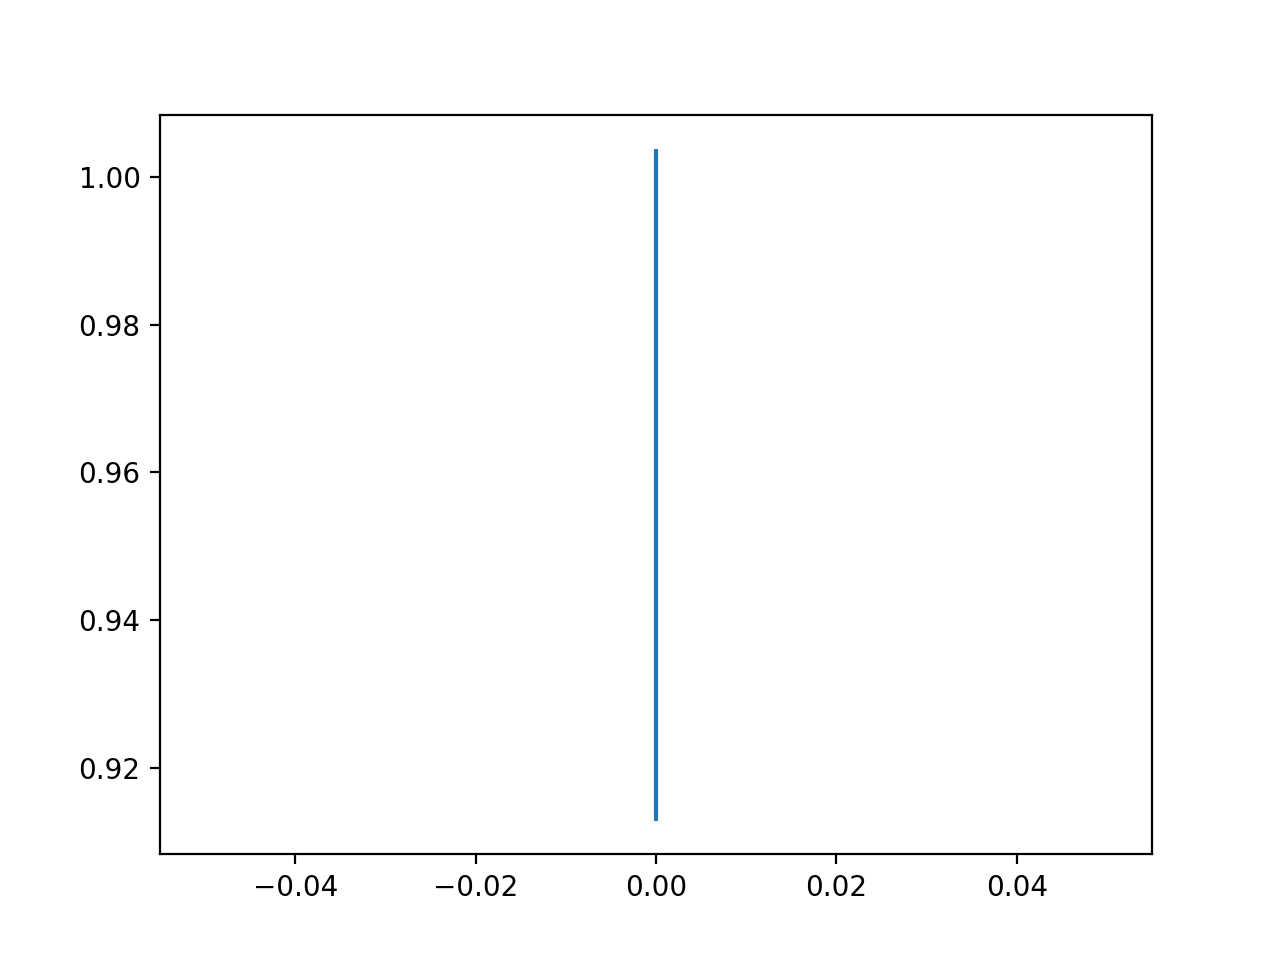

TypeError: Improper input: N=5 must not exceed M=1

In [174]:
def Decaying_sin(x,C,F,phi,tau,A):
    res = (C * np.exp( - (x)/tau)*np.sin(((F*x)+phi)) + A)
    return res 
fig, ax = plt.subplots()
for roi in range(1,2):
    data = []
    reten = []
    err = []
    redX = []
    redY = []
    FORTX = []
    FORTY = []
    for i in range(2,3):
        data = var_2var[i][1]
        reten = reten_2var[i]
        err =  error_2var[i]
        ax.errorbar(data,reten,yerr=err)
        fit = curve_fit(Decaying_sin,data,reten,[0.3,22000,0.2,10,0.5],sigma=err)
        print fit[0][1]
        wat = []
        #wattest=[]
        for x in range(0, len(data)):
            wat.append( Decaying_sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3]),np.float(fit[0][4])))
           # wattest.append( Decaying_sin(data[x], 0.3,40000,1.5,0.01,0.5))
        plt.plot(data,wat)
       # plt.plot(data,wattest)
        plt.show()

<IPython.core.display.Javascript object>


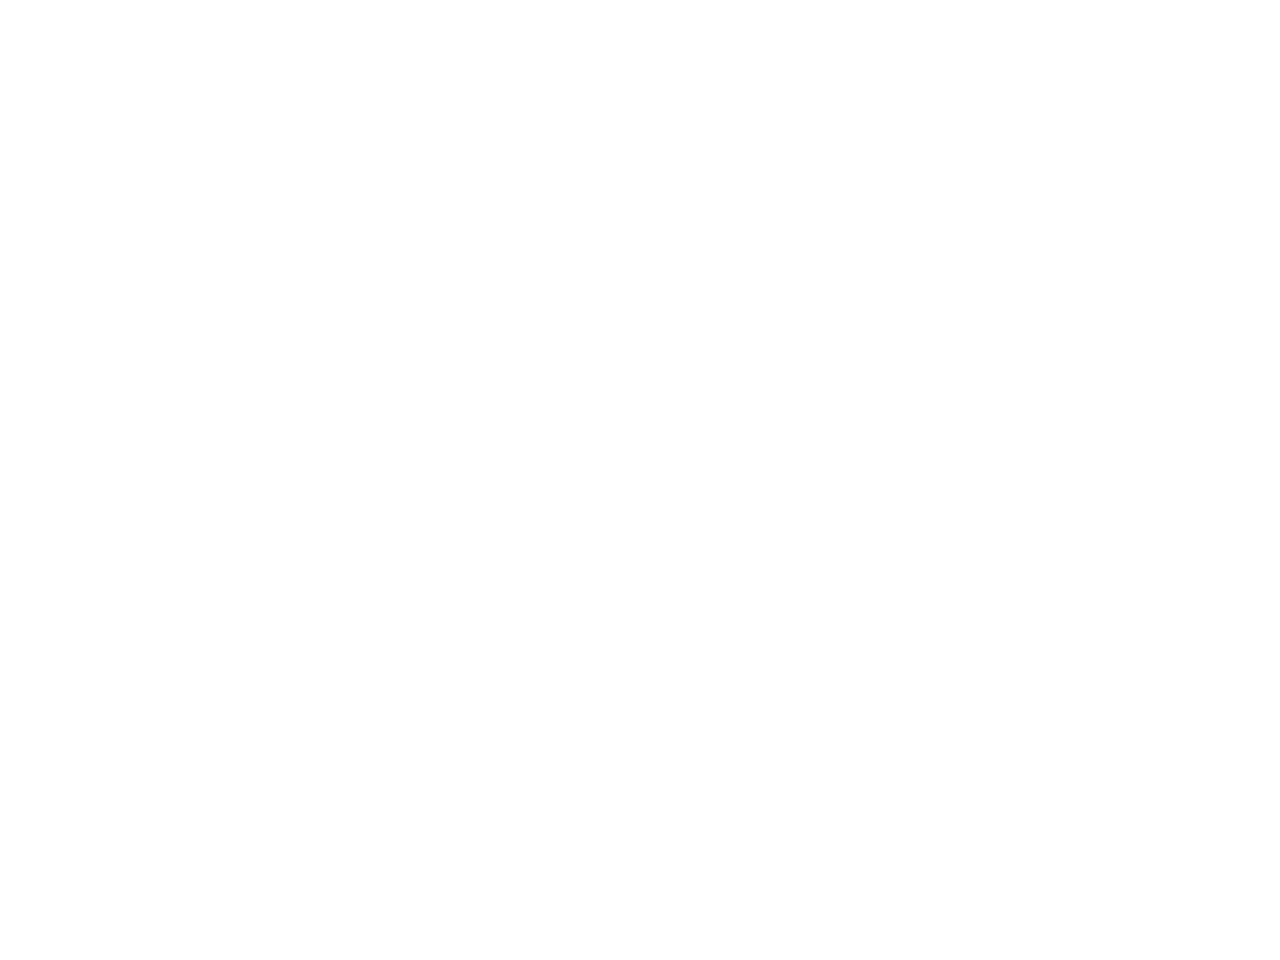

<IPython.core.display.Javascript object>


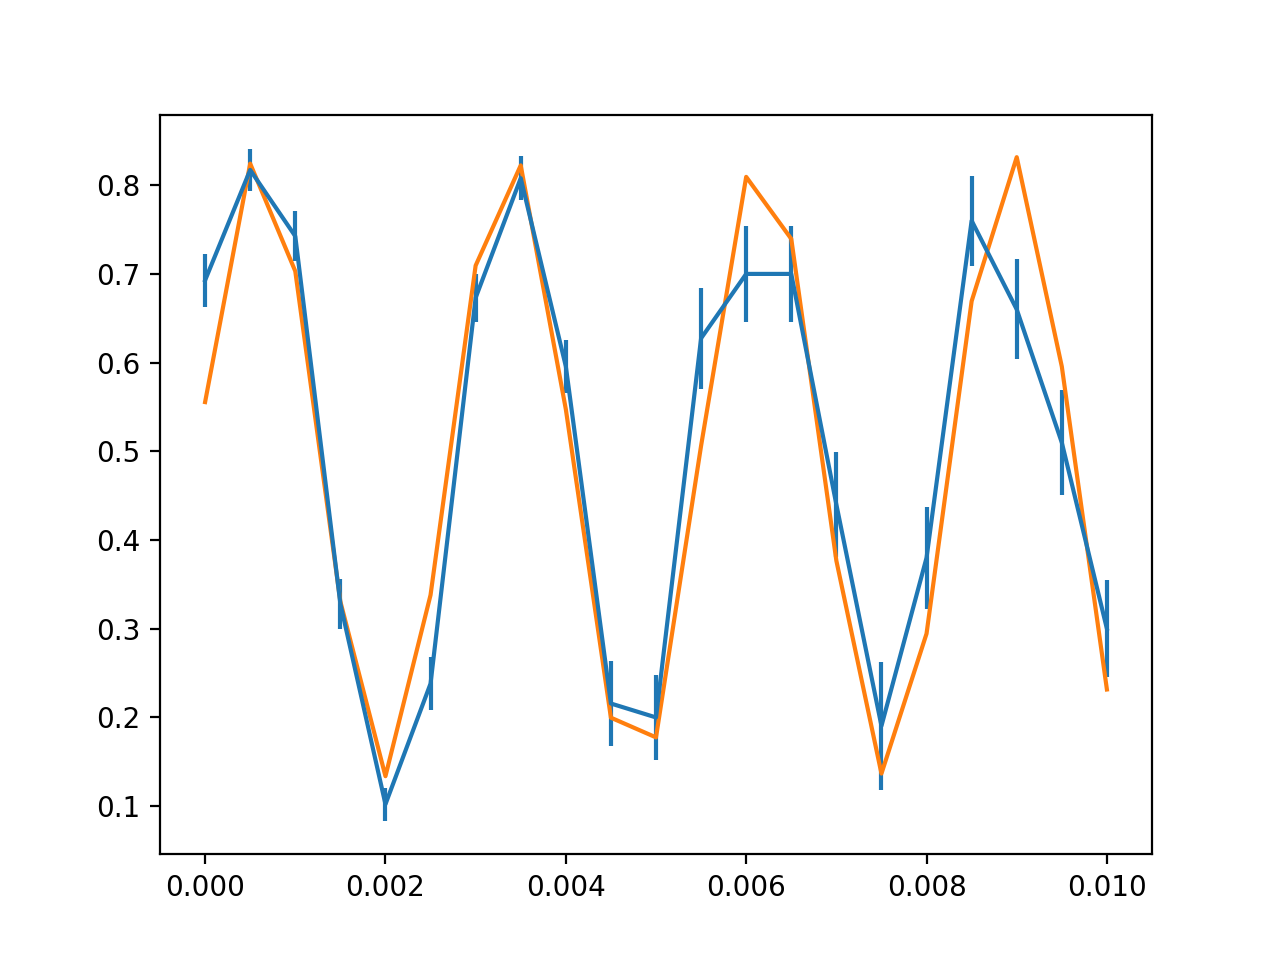

14825.3642196


In [195]:
def Decaying_sin(x,C,F,phi,tau,A):
    res = (C * np.exp( - (x)/tau)*np.sin(((F*x)+phi)) + A)
    return res 
fig, ax = plt.subplots()
try:
    for roi in range(1,2):
        data = []
        reten = []
        err = []
        redX = []
        redY = []
        FORTX = []
        FORTY = []
        for i in range(0,3):
            data = var_2var[i][1]
            reten = reten_2var[i]
            ax.errorbar(data,reten,yerr=err)
            fit = curve_fit(Decaying_sin,data,reten,[0.3,22000,0.2,10,0.5],sigma=err)
            print fit[0][1]
            wat = []
            #wattest=[]
            for x in range(0, len(data)):
                wat.append( Decaying_sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3]),np.float(fit[0][4])))
               # wattest.append( Decaying_sin(data[x], 0.3,40000,1.5,0.01,0.5))
            plt.plot(data,wat)
           # plt.plot(data,wattest)
            plt.show()
            plt.close()
except:
    plt.close()
    fig, ax = plt.subplots()
    for roi in range(2,3):
        data = []
        reten = []
        err = []
        redX = []
        redY = []
        FORTX = []
        FORTY = []
        for i in range(0,1):
            data = var_1var
            reten = reten_1var
            err = error_1var
            ax.errorbar(data,reten,yerr=err)
            fit = curve_fit(Decaying_sin,data,reten,[1,15000,0.2,10,0.5],sigma=err)
            print fit[0][1]
            wat = []
            wattest=[]
            for x in range(0, len(data)):
                wat.append( Decaying_sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3]),np.float(fit[0][4])))
                wattest.append( Decaying_sin(data[x], 0.3,40000,1.5,0.01,0.5))
            plt.plot(data,wat )
           # plt.plot(data,wattest)
            plt.show()

In [10]:
for roi in range(1,2):
    data = []
    reten = []
    err = []
    redX = []
    redY = []
    FORTX = []
    FORTY = []

# #     for i in range(len(reten_2var)):
#     for i in range(0,1):
#         #data = var_2var[i][1]
#         #print data
#         redX = redX_2var[i]
#         print np.mean(redX) ,  np.std(redX)
#         redY = redY_2var[i]
#         print np.mean(redY), np.std(redY)
#         FORTX = FORTX_2var[i]
#         print np.mean(FORTX),np.std(FORTX)
#         FORTY = FORTY_2var[i]
#         print np.mean(FORTY),np.std(FORTY)
#     for i in range(len(reten_2var)):
    for i in range(0,1):
        #data = var_2var[i][1]
        #print data
        redX = redX_1var
        print np.mean(redX) ,  np.std(redX)
        redY = redY_1var
        print np.mean(redY), np.std(redY)
        FORTX = FORTX_1var
        print np.mean(FORTX),np.std(FORTX)
        FORTY = FORTY_1var
        print np.mean(FORTY),np.std(FORTY)


# for roi in range(1,2):
#     data = []
#     reten = []
#     err = []
#     redX = []
#     redY = []
#     FORTX = []
#     FORTY = []
#     for i in range(len(reten_2var)):
#         data = var_2var[i][1]
#         redX = redX_2var[i]
#         redY = redY_2var[i]
#         FORTX = FORTX_2var[i]
#         FORTY = FORTY_2var[i]
# #         plt.plot(data,redX)
# #         plt.show()
#         plt.plot(data,redY)
#         plt.show()
# #         plt.plot(data,FORTX)
# #         plt.show()
# #         plt.plot(data,FORTY)
# #         plt.show()

# #     fit = curve_fit(sin,data,reten,[1,500,-0.19,0.5])
# #     print fit[0]
# #     wat = []
# #     for x in range(0, len(data)):
# #         wat.append( sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3])))
# #     plt.plot(data,wat, c='b' )
# #     plt.show()
        
# # #     plt.plot(data,sin(data, fit[0][0],fit[0][1],fit[0][2],fit[0][3]), c='b' )

# # ax.set_ylim(0, 1)
# # ax.set_xlabel(xlab)
# # ax.set_ylabel('retention')

452.287034819 0.035494240831
539.340122348 0.0514216465348
-0.0952380952381 0.42591771
622.263301173 1.43239331353


<IPython.core.display.Javascript object>


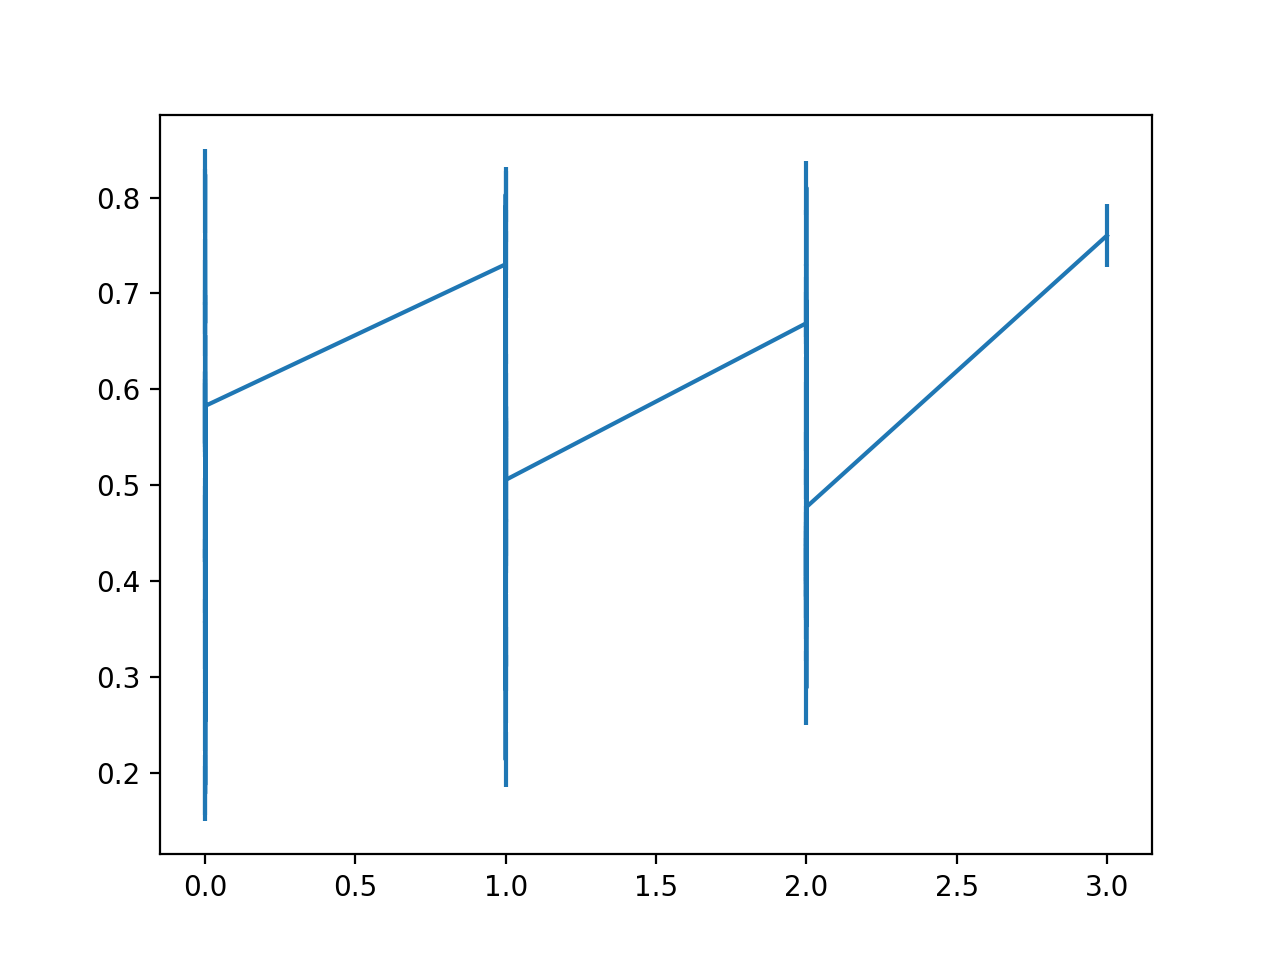

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]
[0.69607843137254899, 0.66911764705882348, 0.72268907563025209, 0.79611650485436891, 0.823943661971831, 0.45454545454545453, 0.17829457364341086, 0.57264957264957261, 0.57894736842105265, 0.32110091743119268, 0.34453781512605042, 0.65625, 0.56779661016949157, 0.40517241379310343, 0.1875, 0.39473684210526316, 0.25352112676056338, 0.58119658119658124, 0.45945945945945948, 0.46534653465346537, 0.58260869565217388, 0.73043478260869565, 0.75572519083969469, 0.79069767441860461, 0.65957446808510634, 0.54471544715447151, 0.34586466165413532, 0.42608695652173911, 0.8029197080291971, 0.54400000000000004, 0.5267857142857143, 0.3482142857142857, 0.3188405797101449, 0.58156028368794

<IPython.core.display.Javascript object>


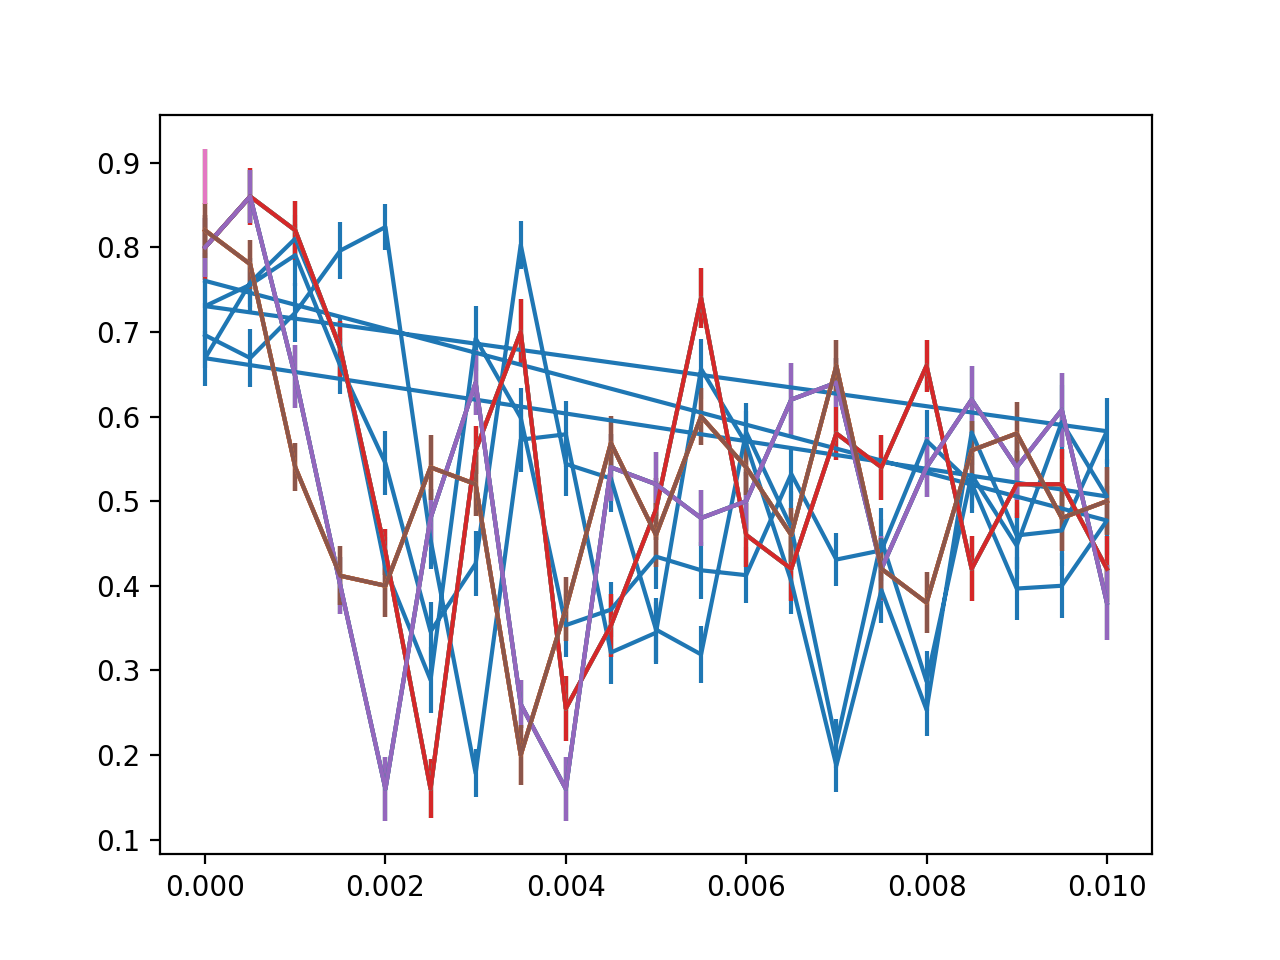

[0.0, 0.00050000000000000001, 0.001, 0.0015, 0.002, 0.0025000000000000001, 0.0030000000000000001, 0.0035000000000000001, 0.0040000000000000001, 0.0045000000000000005, 0.0050000000000000001, 0.0054999999999999997, 0.0060000000000000001, 0.0065000000000000006, 0.0070000000000000001, 0.0074999999999999997, 0.0080000000000000002, 0.0085000000000000006, 0.0090000000000000011, 0.0094999999999999998, 0.01, 0.0, 0.00050000000000000001, 0.001, 0.0015, 0.002, 0.0025000000000000001, 0.0030000000000000001, 0.0035000000000000001, 0.0040000000000000001, 0.0045000000000000005, 0.0050000000000000001, 0.0054999999999999997, 0.0060000000000000001, 0.0065000000000000006, 0.0070000000000000001, 0.0074999999999999997, 0.0080000000000000002, 0.0085000000000000006, 0.0090000000000000011, 0.0094999999999999998, 0.01, 0.0, 0.00050000000000000001, 0.001, 0.0015, 0.002, 0.0025000000000000001, 0.0030000000000000001, 0.0035000000000000001, 0.0040000000000000001, 0.0045000000000000005, 0.0050000000000000001, 0.0054

In [39]:

# print np.shape(np.squeeze(retention['error']))
# print np.squeeze(retention['ivar'])[1]
# print np.squeeze(retention['error'])
#print len(np.squeeze(retention['ivar']))
#print np.shape(np.squeeze(retention['ivar']))[1]
# for roi in range(np.shape(np.squeeze(retention['ivar']))[1]):
for roi in range(1,2):
#     print np.shape(np.squeeze(retention['ivar']))
#     print len(np.squeeze(retention['ivar'])[0])
    for e in range(len(np.squeeze(retention['ivar']))):
        fig, ax = plt.subplots()
        data = []
        reten = []
        err = []
        for j in range(len(np.squeeze(retention['ivar'])[e])):
            data.append(np.squeeze(retention['ivar'])[e][j][roi])
            reten.append(np.squeeze(retention['retention'])[j][roi])
            err.append(np.squeeze(retention['error'])[j][roi])
        ax.errorbar(data,reten,yerr=err)
        plt.show()
        print data
        print reten
#     fit = curve_fit(sin,data,reten,[1,500,-0.19,0.5])
#     print fit[0]
#     wat = []
#     for x in range(0, len(data)):
#         wat.append( sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3])))
#     plt.plot(data,wat, c='b' )
#     plt.show()
        
# #     plt.plot(data,sin(data, fit[0][0],fit[0][1],fit[0][2],fit[0][3]), c='b' )

# ax.set_ylim(0, 1)
# ax.set_xlabel(xlab)
# ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


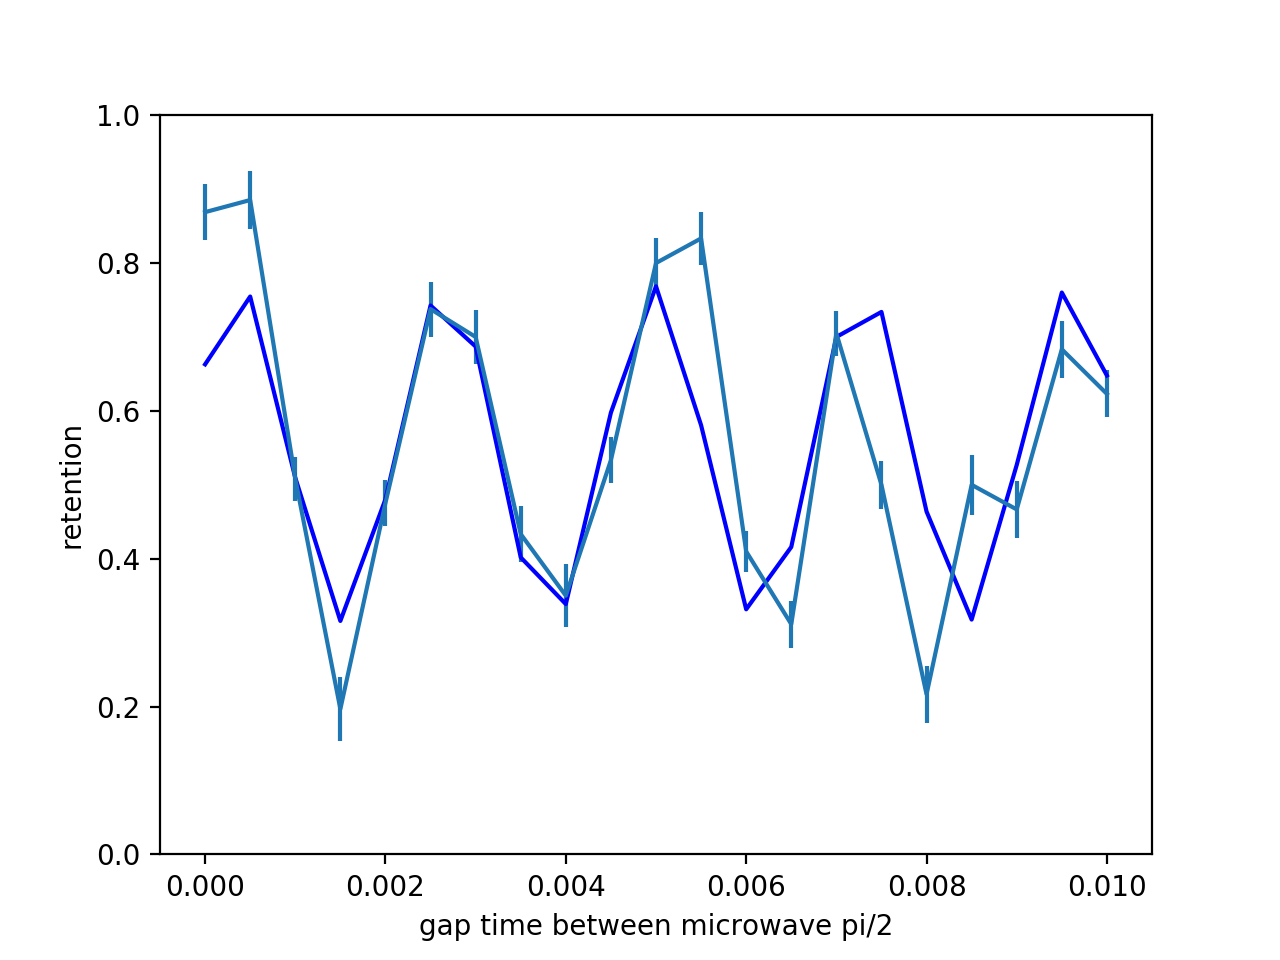

[  2.26667385e-01   4.33312005e+02   5.62678642e-01   5.42021078e-01]


In [9]:
fig, ax = plt.subplots()
# print np.shape(np.squeeze(retention['error']))
# print np.squeeze(retention['ivar'])[1]
# print np.squeeze(retention['error'])
#print len(np.squeeze(retention['ivar']))
#print np.shape(np.squeeze(retention['ivar']))[1]
# for roi in range(np.shape(np.squeeze(retention['ivar']))[1]):
for roi in range(2,3):
    
    data = []
    reten = []
    err = []
    for e in range(len(np.squeeze(retention['ivar']))):
        data.append(np.squeeze(retention['ivar'])[e][roi])
        reten.append(np.squeeze(retention['retention'])[e][roi])
        err.append(np.squeeze(retention['error'])[e][roi])
   # print reten
    ax.errorbar(data,reten,yerr=err)
    fit = curve_fit(sin,data,reten,[1,500,-0.19,0.5])
    print fit[0]
    wat = []
    for x in range(0, len(data)):
        wat.append( sin(data[x], np.float(fit[0][0]),np.float(fit[0][1]),np.float(fit[0][2]),np.float(fit[0][3])))
    plt.plot(data,wat, c='b' )
    plt.show()
        
#     plt.plot(data,sin(data, fit[0][0],fit[0][1],fit[0][2],fit[0][3]), c='b' )

ax.set_ylim(0, 1)
ax.set_xlabel(xlab)
ax.set_ylabel('retention')

<IPython.core.display.Javascript object>


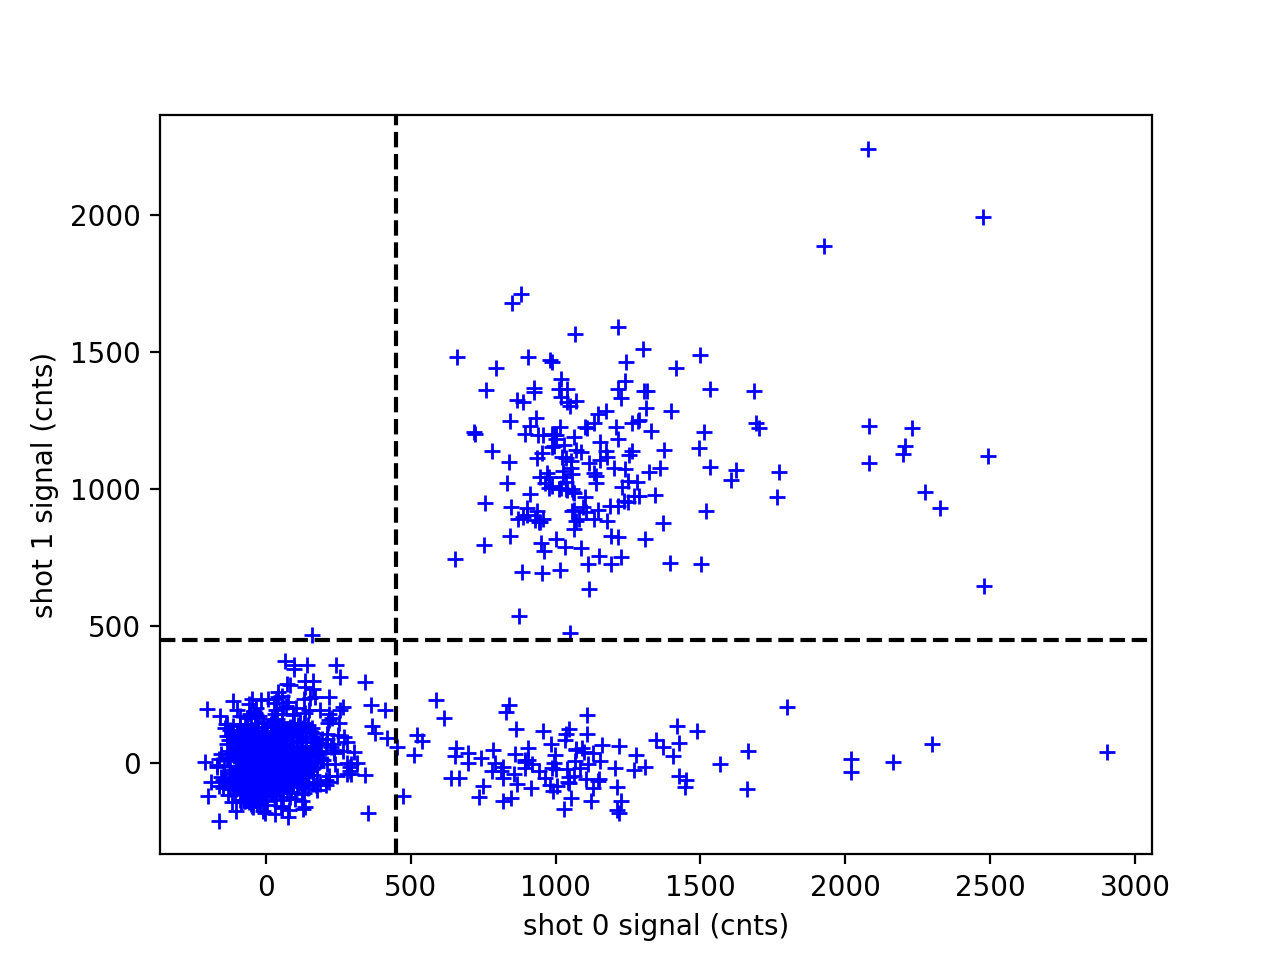

In [10]:
itr = 0*(len(np.squeeze(retention['ivar'])[e])-1)
fig, ax = plt.subplots()
s0_data = np.squeeze(q.experiments[0]['iterations'][itr]['signal_data'])[:,0]
s1_data = np.squeeze(q.experiments[0]['iterations'][itr]['signal_data'])[:,1]

ax.plot(s0_data, s1_data, 'b+')

for xc in cuts[0]:
    plt.axvline(x=xc, color='k', linestyle='--')
for xc in cuts[1]:
    plt.axhline(y=xc, color='k', linestyle='--')

ax.set_xlabel('shot 0 signal (cnts)')
ax.set_ylabel('shot 1 signal (cnts)')